In [1]:
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
import scipy.signal
import torch
from PIL import Image
from torchvision.transforms import ToTensor
import os

In [2]:
from ret_analysis_functions import * #imports utilities.py file which has functions for plotting psychometrics and other useful things


In [3]:
path = "/Volumes/Runyan2/Akhil/Sensory Mapping + Retinotopy_AKHIL/HR-4-1L/24-Nov-2023_1/"
path_azimuth_LR, path_azimuth_RL, path_elevation_UD, path_elevation_DU = retinotopy_analysis.get_data_location(path, 2)


In [4]:
tensor_azimuthLR = retinotopy_analysis.create_tensor_from_dat(path_azimuth_LR)
tensor_azimuthRL = retinotopy_analysis.create_tensor_from_dat(path_azimuth_RL)
tensor_elevationUD = retinotopy_analysis.create_tensor_from_dat(path_elevation_UD)
tensor_elevationDU = retinotopy_analysis.create_tensor_from_dat(path_elevation_DU)

In [5]:
tensor_azimuth, tensor_elevation = retinotopy_analysis.corrected_az_elev(tensor_azimuthLR, tensor_azimuthRL, tensor_elevationUD, tensor_elevationDU)

In [6]:
corrected_movie_az = retinotopy_analysis.create_stimulus_corrected_movie_pt(tensor_azimuth, 0, 60)
corrected_movie_elev = retinotopy_analysis.create_stimulus_corrected_movie_pt(tensor_elevation, 0, 60)

In [7]:
# Create a function that takes the wavesurfer files and identifies the imaging and stim onset times #

In [22]:
phase_map_az = retinotopy_analysis.get_phase_map(corrected_movie_az[65:715], 30.0, 0.043)
phase_map_elev = retinotopy_analysis.get_phase_map(corrected_movie_elev[54:648], 30.0, 0.048)

In [23]:
visual_field_map = retinotopy_analysis.visualSignMap(phase_map_az[0], phase_map_elev[0])

(-0.5, 299.5, 299.5, -0.5)

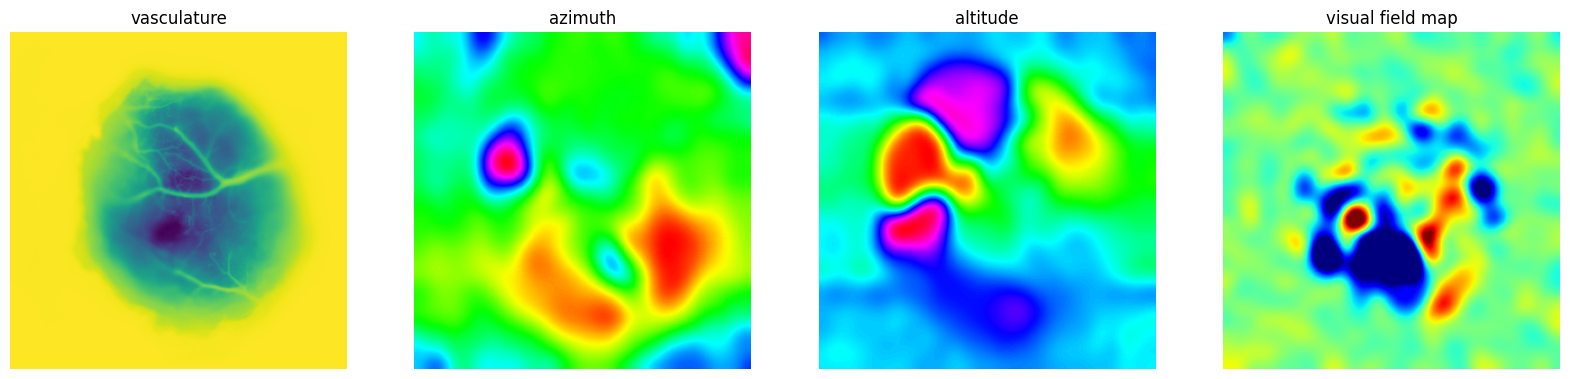

In [24]:
from scipy.ndimage import gaussian_filter

def rotation(image):
    rotated_image = np.rot90(image)
    flipped_image = np.flipud(rotated_image)
    return flipped_image

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
std_dev_range=(8, 10)
mean_std_dev = np.mean(std_dev_range)

axs[0].imshow(rotation(tensor_azimuth.mean(axis=0)))
axs[0].set_title("vasculature")
axs[0].axis('off')

axs[1].imshow(rotation(gaussian_filter(phase_map_az[0], sigma=std_dev_range)), cmap='hsv')
axs[1].set_title("azimuth")
axs[1].axis('off')

axs[2].imshow(rotation(gaussian_filter(phase_map_elev[0], sigma=std_dev_range)), cmap='hsv')
axs[2].set_title("altitude")
axs[2].axis('off')

axs[3].imshow(rotation(gaussian_filter(visual_field_map, sigma=mean_std_dev)), cmap='jet', clim=[-0.15,0.15])
axs[3].set_title("visual field map")
axs[3].axis('off')

(-0.5, 299.5, 299.5, -0.5)

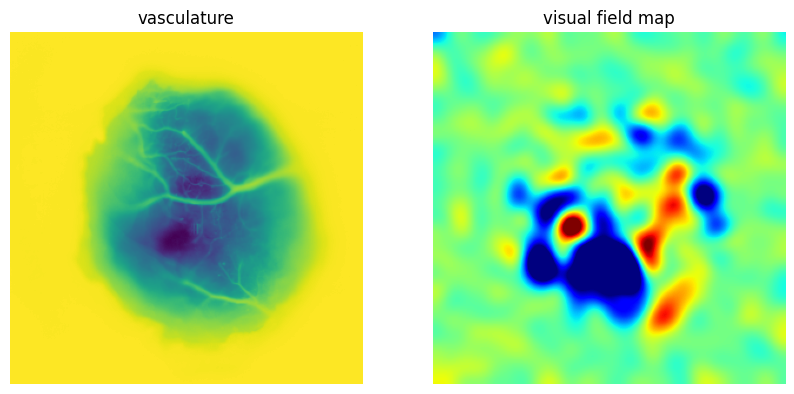

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
std_dev_range=(8, 10)
mean_std_dev = np.mean(std_dev_range)

axs[0].imshow(rotation(tensor_azimuth.mean(axis=0)))
axs[0].set_title("vasculature")
axs[0].axis('off')

axs[1].imshow(rotation(gaussian_filter(visual_field_map, sigma=mean_std_dev)), cmap='jet', clim=[-0.15,0.15])
axs[1].set_title("visual field map")
axs[1].axis('off')